<a href="https://colab.research.google.com/github/sakshighugare/EDA-Playstore-data-analysis/blob/main/final_self_copy_Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Import libraries**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Creating path variable for both the datasets

In [3]:
#creating data files path and reading the csv files
playstore_datapath = '/content/drive/MyDrive/play store csv/Play Store Data.csv'
Playstore_df = pd.read_csv(playstore_datapath)
user_reviews_path = '/content/drive/MyDrive/play store csv/User Reviews.csv'
user_reviews_df = pd.read_csv(user_reviews_path)

In [4]:
#viewing  data of playstore dataframe 
Playstore_df.head(-1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [5]:
#viewing information of playstore dataframe
Playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#viewing the available numeric column details
Playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
#viewing the columns name
Playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#View dataset features, values and user review database



In [8]:
#viewing the database
user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [9]:
#viewing the database info
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
#viewing the database numeric details
user_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


# **cleaning the data of playstore database**
  
 
### * convert "size" of column into valid numerical column

### *  convert "reviews" column into valid numerical column 

### *  convert "installs" column into valid numerical column 



In [11]:
# Find the row with insufficiant data from playstore
Playstore_df[Playstore_df['Type']!='Free'][Playstore_df[Playstore_df['Type']!='Free']['Price']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [12]:
#Drop the row from the data frame
Playstore_df.drop(Playstore_df[Playstore_df['Type']!='Free'][Playstore_df[Playstore_df['Type']!='Free']['Price']=='0'].index, inplace=True)

In [13]:
#Finding value mismatched row
Playstore_df[Playstore_df['Genres']=='February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#find the index of the row which containing the carbage values
Playstore_df[Playstore_df['Genres']=='February 11, 2018'].index

Int64Index([10472], dtype='int64')

In [15]:
#Drop the found carbage row from given dataframe
Playstore_df.drop(Playstore_df[Playstore_df['Genres']=='February 11, 2018'].index, inplace=True)

In [16]:
# use clean string function
def clean_it(num):
  """This  clean string function takes a string and replace them with following  characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if '+' in str(num):
    num = num.replace('+','')
  if '$' in str(num):
    num = num.replace('$','')
  if ',' in str(num):
    num = num.replace(',','')
  if 'M' in str(num):
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in str(num):
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in str(num):
    num = '0'
  else:
    pass
  return num

In [17]:
## Cleaning the unwanted characters  and converting them with  required column values into valid numeric type

#Changing the 'Reviews' column values into valid numeric values
Playstore_df['Reviews'] = pd.to_numeric(Playstore_df['Reviews'])

#Changing the 'Installs' column values into valid numeric values
Playstore_df['Installs'] = pd.to_numeric(Playstore_df['Installs'].map(lambda x: clean_it(x)))

#Changing the 'Size' column values into valid numeric values
Playstore_df['Size'] = Playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Playstore_df['Size'] = pd.to_numeric(Playstore_df['Size'].map(lambda x: clean_it(x)))


#Changing the 'Price' column values into valid numeric values
Playstore_df['Price'] = pd.to_numeric (Playstore_df['Price'].map(lambda x:clean_it(x)))
Playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  int64  
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


# cleaning the user review data  

In [18]:
#Eleminating the null value  present in the rows from the database
non_null_user_reviews_df = user_reviews_df[~user_reviews_df['Sentiment'].isna()]
non_null_user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [19]:
non_null_user_reviews_df


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


# *Data preparation *
*   By considering only unique apps details in given dataframe
*  grouping the required columns such as Count, Reviews, Size, Rating and Installs, Price based on the Genres from the dataframe



In [20]:
#Filter all duplicate apps
duplicate_colm = Playstore_df['App'].duplicated().any()
duplicate_colm

True

In [21]:
# Apps and there numbers 
Playstore_df['App'].value_counts()



ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
U-Report                                             1
U of I Community Credit Union                        1
Waiting For U Launcher Theme                         1
Wi u Emulator                                        1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 9658, dtype: int64

In [22]:
#taking all the last rows of data for each app
playst_lrow_df = Playstore_df.groupby('App').tail(1).reset_index()
appreview_maxm_df = playst_lrow_df.loc[playst_lrow_df.groupby(['App'])['Reviews'].idxmax()]

In [23]:
#Getting Genres
top_genres_df = appreview_maxm_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [24]:
top_genres_df

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,419
4,Medical,396
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Art & Design;Pretend Play,1
115,Travel & Local;Action & Adventure,1
116,Trivia;Education,1


In [25]:
appreview_maxm_df[appreview_maxm_df['Price'] == 0]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7703,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3600000,500,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
7351,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
267,324,- Free Comics - Comic Apps,COMICS,3.5,115,9100000,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3360,4541,.R,TOOLS,4.5,259,203000,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
3455,4636,/u/app,COMMUNICATION,4.7,573,53000000,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,6420,감성학원 BL 첫사랑,COMICS,4.4,190,34000000,10000,Free,0.0,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up
5153,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59000000,100000,Free,0.0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
1774,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18000000,1000000,Free,0.0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
6378,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3200000,10000,Free,0.0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [26]:
#Preparing dataframe which contains free app install counts
genres_free_apps_installs_df = appreview_maxm_df[appreview_maxm_df['Price'] == 0].groupby(['Genres'])[['Installs']].sum()
genres_free_apps_installs_df

,Installs
Genres,
Action,3465986940
Action;Action & Adventure,53000000
Adventure,295417120
Adventure;Action & Adventure,106000000
Adventure;Education,10000000
...,...
Trivia;Education,100
Video Players & Editors,3916931720
Video Players & Editors;Music & Video,15000000


In [27]:
#Preparing dataframe which contains paid app install counts
genres_paid_apps_installs_df = Playstore_df[Playstore_df['Price']!= 0].groupby(['Genres'])[['Installs']].sum().rename(columns={'Installs':'Paid_app_installs'})

In [28]:
#Preparing dataframe which contains mean Rating
genres_ratings_df = appreview_maxm_df.groupby(['Genres'])[['Rating']].mean()
genres_ratings_df

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Trivia;Education,NaN
Video Players & Editors,4.043243
Video Players & Editors;Music & Video,4.000000


In [29]:
#Mergering all the data previous dataframes
top_genres_installs_df = pd.merge(top_genres_df, genres_free_apps_installs_df, on='Genres')
top_genres_apps_installs_df = pd.merge(top_genres_installs_df, genres_paid_apps_installs_df, on='Genres')
top_genres_apps_installs_ratings_df = pd.merge(top_genres_apps_installs_df, genres_ratings_df, on='Genres')

#Getting top 15 data frames based on the Genres
top_30_genres_df = top_genres_apps_installs_ratings_df.head(30)
top_30_genres_df

,Genres,Count,Installs,Paid_app_installs,Rating
0,Tools,828,8091044474,1727441,4.039638
1,Entertainment,561,3014472513,242171,4.083439
2,Education,510,262803901,106247,4.290909
3,Business,419,691952090,412775,4.096565
4,Medical,396,38642344,1020033,4.169416
5,Personalization,376,1529235988,5258794,4.332215
6,Productivity,374,5786679314,1412055,4.183389
7,Lifestyle,368,492644429,1179110,4.093667
8,Finance,345,455163132,185602,4.115563
9,Sports,331,1411230683,1243815,4.223308


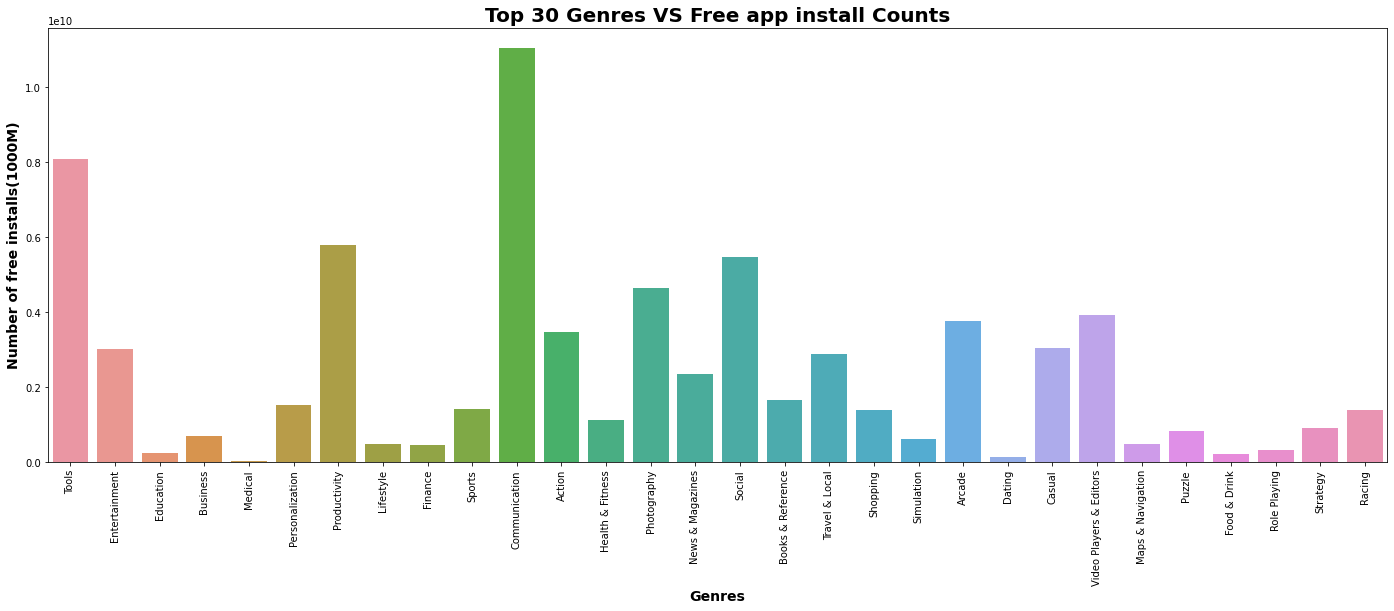

In [30]:

a = top_30_genres_df.Installs.value_counts().head(30)
plt.figure(figsize=(24,8))
sns.barplot(x = top_30_genres_df.Genres , y =top_30_genres_df.Installs  )
plt.xticks(rotation=90)
plt.title('Top 30 Genres VS Free app install Counts', fontsize = 20 , fontweight = "bold")
plt.ylabel('Number of free installs(1000M)', fontsize = 14 , fontweight = "bold")
plt.xlabel('Genres', fontsize = 14 , fontweight = "bold")
plt.show()